Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

Importo las librerías necesarias

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

Cargo los datos del dataframe

In [18]:
df = pd.read_csv("data/train.csv")

Reviso las primeras 5 filas

In [19]:
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.06,0.09,0.09,1.97,1.48,...,0.03,9.52,0.84,0.00,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.03,4.66,0.56,1.89,1.36,...,0.17,13.83,1.15,0.01,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.04,0.06,0.06,0.05,0.00,...,0.12,2.61,1.52,0.01,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.09,0.57,0.00,0.36,0.03,...,0.06,5.22,1.96,0.00,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.00,0.80,0.43,1.38,0.11,...,0.14,9.75,1.89,0.01,27.17,5.42,0.08,0.19,0.02,1


Y las 5 últimas por si se ve algo raro

In [20]:
df.tail()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
5592,3048,0.01,8.92,0.20,4.88,0.05,0.36,0.09,0.54,0.14,...,0.07,8.60,1.90,0.01,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.00,3.42,0.03,1.39,1.12,...,0.11,9.36,1.58,0.01,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.04,0.09,0.10,1.88,0.33,...,0.02,18.78,0.62,0.01,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.00,4.43,0.63,1.94,1.27,...,0.19,13.32,1.93,0.01,23.84,4.80,0.08,0.22,0.07,0
5596,3294,0.09,10.81,0.69,2.67,0.06,5.97,0.02,1.15,0.53,...,0.09,8.15,1.72,0.00,36.53,5.66,0.00,0.17,0.02,0


Ahora voy a revisar el tamaño del data frame, el tipo de dato de las columnas y si existen valores nulos

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

Ahora veo los valores mínimo, máximo, medio y mediana de cada columna

In [22]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,...,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00,5597.00
mean,3962.91,0.67,14.44,0.16,1.58,0.04,2.21,0.25,0.81,0.77,...,0.10,9.82,1.33,0.01,16.62,2.93,0.05,0.15,0.04,0.11
std,2311.13,1.27,8.85,0.25,1.22,0.04,2.58,0.27,0.65,0.44,...,0.06,5.58,0.57,0.00,17.73,2.33,0.03,0.14,0.03,0.32
min,0.00,0.00,-0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1963.00,0.04,6.85,0.03,0.55,0.01,0.10,0.05,0.09,0.40,...,0.05,4.94,1.01,0.00,2.22,0.82,0.02,0.04,0.02,0.00
50%,3922.00,0.07,14.39,0.05,1.21,0.04,0.55,0.09,0.75,0.76,...,0.10,9.86,1.42,0.01,7.84,2.43,0.05,0.08,0.05,0.00
75%,5960.00,0.29,22.26,0.10,2.51,0.07,4.33,0.45,1.39,1.16,...,0.15,14.69,1.76,0.01,29.98,4.67,0.07,0.25,0.07,0.00
max,7993.00,5.05,29.84,1.05,4.94,0.13,8.66,0.90,2.00,1.50,...,0.20,19.82,2.89,0.01,60.01,7.99,0.10,0.50,0.09,1.00


Aquí veo una gráfica de los datos de cada columna

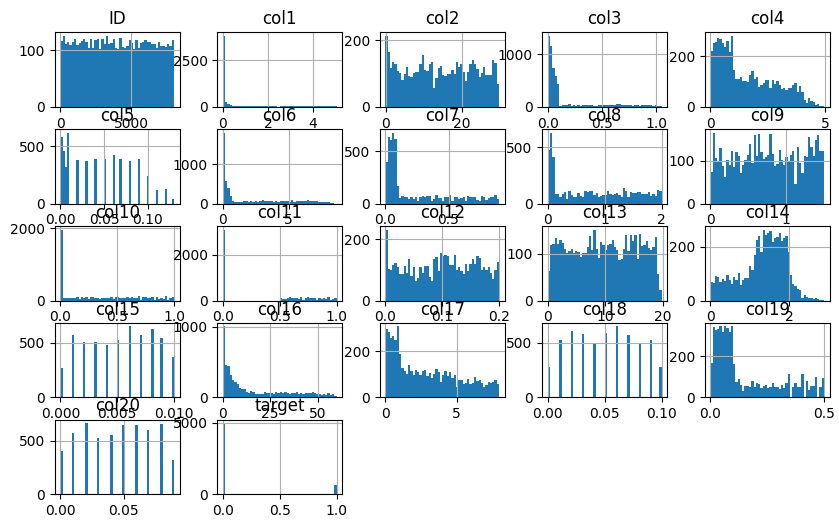

In [23]:
df.hist(bins=50, figsize=(10, 6));

Ahora voy a ver un mapa de calor de calor de cada una de las columnas

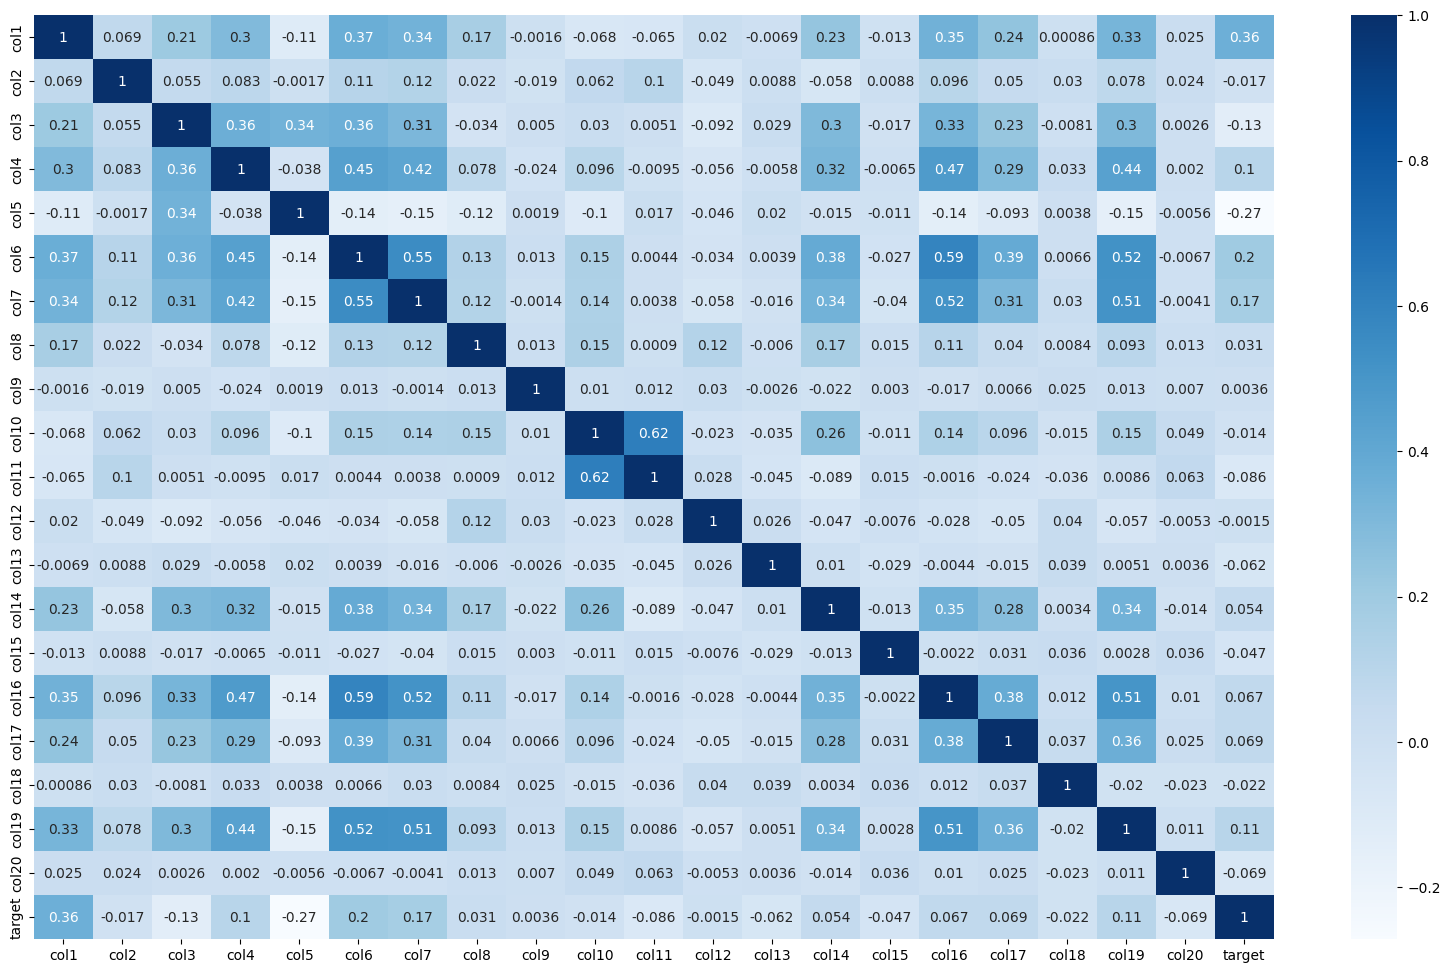

In [24]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.drop('ID', axis=1).corr(numeric_only=True), annot=True, cmap='Blues');

## Preparacion y normalización de los datos

In [25]:
def eliminar_outliers(df: pd.DataFrame, columnas: list) -> pd.DataFrame:
    """
    Elimina filas que contienen valores atípicos (outliers) en las columnas especificadas de un DataFrame.

    Argumentos:
        df: El DataFrame de entrada.
        columnas: Una lista con los nombres de las columnas a analizar para detectar outliers.

    Retorno:
        Un nuevo DataFrame con los outliers eliminados, basado en la puntuación Z.

    Excepciones:
        ValueError: Si la lista `columnas` está vacía.

    Advertencias:
        UserWarning: Si no se encuentran outliers en ninguna columna.
        UserWarning: Si el umbral de puntuación Z no se ajusta en base al conocimiento del dominio.
    """

    if not columnas:
        raise ValueError("La lista 'columnas' no debe estar vacía.")

    se_eliminaron_outliers = False  # flag para indicar si se eliminaron outliers

    for columna in columnas:
        if columna not in df.columns:
            warnings.warn(f"La columna '{columna}' no se encuentra en el DataFrame. Se omite.")
            continue

        puntuaciones_z = np.abs(stats.zscore(df[columna]))
        outliers_z = np.where(puntuaciones_z > 3)[0]  # Outliers según un umbral de puntuación Z de 3

        if len(outliers_z) > 0:
            df = df.drop(df.index[outliers_z])
            se_eliminaron_outliers = True

        if not se_eliminaron_outliers:
            warnings.warn(f"No se detectaron outliers en la columna '{columna}' usando el umbral predeterminado de puntuación Z de 3.")

    return df
    

def aplicar_logaritmo(df: pd.DataFrame, columnas: list) -> pd.DataFrame:
  """
  Aplica la función logaritmo natural (base e) a las columnas especificadas de un DataFrame de pandas.

  Argumentos:
    df: El DataFrame de entrada.
    columnas: Una lista con los nombres de las columnas a las que se aplicará el logaritmo.

  Retorno:
    Un nuevo DataFrame con las columnas especificadas transformadas por la función logaritmo.
  """

  for columna in columnas:
    if columna not in df.columns:
      raise ValueError(f"La columna '{columna}' no se encuentra en el DataFrame.")

    df[columna] = np.log(df[columna] + 1)

  return df

Elimino la columna ID, ya que parece que no aporta nada al entrenamiento

In [26]:
df = df.drop('ID', axis=1)

Aparentemente los datos están escalados pero no normalizados, procedo a hacer la normalización por logaritmo de las columnas: 1, 3, 6, 7, 8, 10, 11, 16, 17 y 19

In [27]:
df = aplicar_logaritmo(df, ['col1', 'col3', 'col6', 'col7', 'col8', 'col10', 'col11', 'col16', 'col17', 'col19'])

Ahora voy a quitar los outlayers

In [28]:
df = eliminar_outliers(df, ['col1', 'col3', 'col4', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col16', 'col17', 'col19'])

Divido el dataframe para tener un dataframe de entrenamiento y otro de validación

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop(columns="target"), df[["target"]], test_size=0.2, random_state=42)

Utilizo la función lazypredict ya que me prueba 42 modelos distintos de regresión

In [47]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, random_state=42)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

predictions.head()

100%|██████████| 42/42 [00:24<00:00,  1.71it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3018
[LightGBM] [Info] Number of data points in the train set: 4442, number of used features: 20
[LightGBM] [Info] Start training from score 0.114138


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.74,0.74,0.16,0.13
HistGradientBoostingRegressor,0.73,0.74,0.16,1.11
XGBRegressor,0.72,0.72,0.17,0.18
ExtraTreesRegressor,0.71,0.71,0.17,0.71
RandomForestRegressor,0.71,0.71,0.17,3.49


Como podemos ver la mejor opción es un RandomForestRegressor

Ahora voy a ver 29 modelos de clasificación

In [48]:
from lazypredict.Supervised import LazyClassifier

reg = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=42)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

predictions.head()

100%|██████████| 29/29 [00:05<00:00,  5.35it/s]

[LightGBM] [Info] Number of positive: 507, number of negative: 3935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3018
[LightGBM] [Info] Number of data points in the train set: 4442, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114138 -> initscore=-2.049155
[LightGBM] [Info] Start training from score -2.049155


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.97,0.89,0.89,0.96,0.16
LGBMClassifier,0.96,0.88,0.88,0.96,0.14
DecisionTreeClassifier,0.95,0.88,0.88,0.95,0.06
BaggingClassifier,0.96,0.87,0.87,0.96,0.37
RandomForestClassifier,0.96,0.84,0.84,0.96,1.01


Parece que XGBClassifier es la mejor opción

## Entrenamiento del modelo

Voy a crear un gridsearch para ver que hiperparámetros son los mejores para el modelo seleccionado

In [43]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model = XGBClassifier()

param_grid = {
    "learning_rate": [0.01, 0.1, 0.5],
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
}

grid_search = GridSearchCV(model, param_grid, scoring="precision")

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_

print("Best model:", best_model)
print("Best parameters:", best_params)


Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100}


Parece que los mejores son: 
- 'learning_rate': 0.01
- 'max_depth': 7
- 'min_child_weight': 1
- 'n_estimators': 100

Procedemos a entrenar nuestro modelo con esos datos

In [45]:
params = {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100}
clf = XGBClassifier(**params)
clf.fit(X_train, y_train)

predictions = clf.predict(X_val)

Ahora vamos a ver las métricas de este modelo

In [46]:
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error

print("MAE", mean_absolute_error(y_val, predictions))
print("Precision", precision_score(y_val, predictions))
print("MSE", mean_squared_error(y_val, predictions))
print("RMSE", np.sqrt(mean_squared_error(y_val, predictions)))

MAE 0.039603960396039604
Precision 0.967391304347826
MSE 0.039603960396039604
RMSE 0.19900743804199783


Parece que el modelo tiene una precision de más del 96%, el MSE, MAE y RMSE tienen muy buenos valores

In [50]:
X_pred = pd.read_csv("data/test.csv")

X_pred = X_pred.drop('ID', axis=1)
X_pred = aplicar_logaritmo(X_pred, ['col1', 'col3', 'col6', 'col7', 'col8', 'col10', 'col11', 'col16', 'col17', 'col19'])

predictions_submit = clf.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 1])